The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<Axes: title={'center': 'Bitcoin Close Price'}, xlabel='Timestamp'>

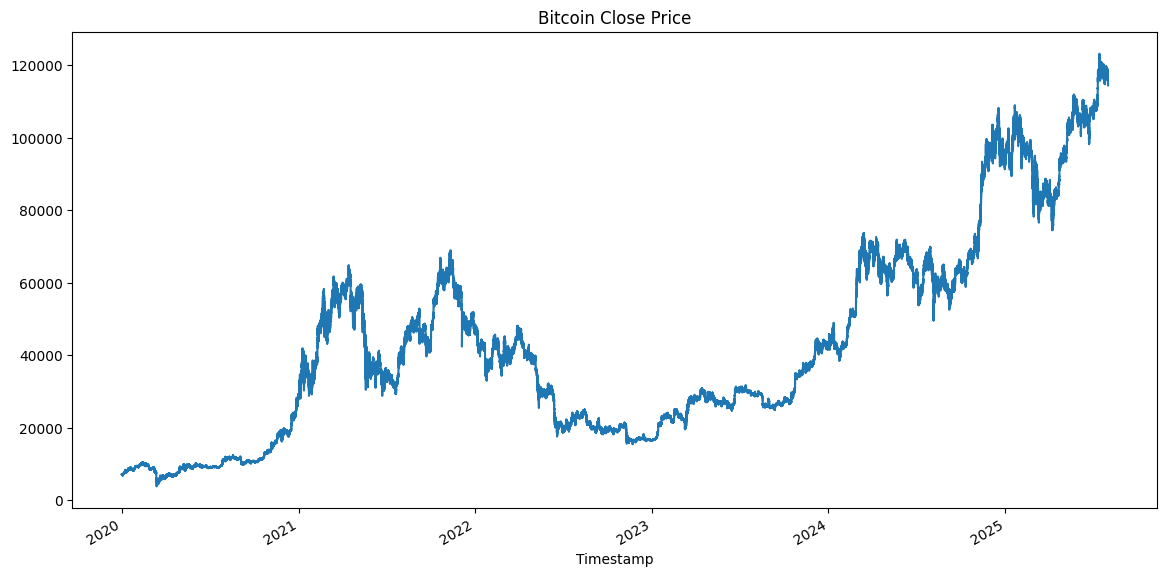

In [5]:
# import pandas as pd
# from datetime import datetime
# bitstamp = pd.read_csv("btcusd_1-min_data.csv")
# bitstamp.info()
# bitstamp['Timestamp'] = pd.to_datetime(bitstamp['Timestamp'], unit='s')
# bitstamp.set_index('Timestamp', inplace=True)
# bitstamp.tail()
%load_ext autoreload
%autoreload 2
import sys
import os
sys.path.append(os.path.abspath("../src"))
from preprocessing import *

# Load the data
bitstamp = dataload()

# Filter the data from 2020-01-01 to the last date available
bitstamp = data_filter(bitstamp, '2020-01-01', bitstamp.index[-1])

# Plotting the Close price
bitstamp.Close.plot(figsize=(14,7), title="Bitcoin Close Price")

Missing values in the dataset:
Missing timestamps: 1160
DatetimeIndex(['2025-03-15 00:01:00', '2025-03-15 00:02:00',
               '2025-03-15 00:03:00', '2025-03-15 00:04:00',
               '2025-03-15 00:05:00', '2025-03-15 00:06:00',
               '2025-03-15 00:07:00', '2025-03-15 00:08:00',
               '2025-03-15 00:09:00', '2025-03-15 00:10:00'],
              dtype='datetime64[ns]', freq='min')


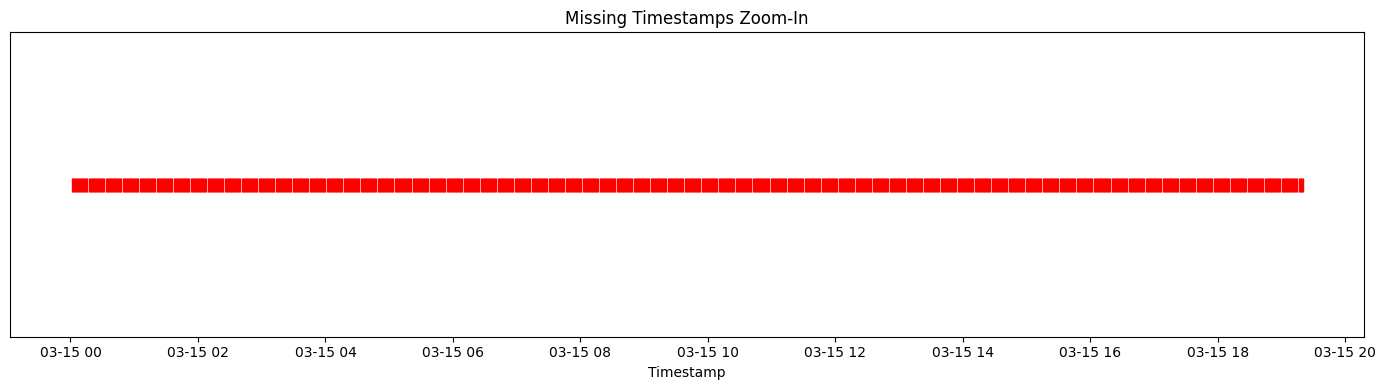

In [6]:
#calculating missing values in the dataset
import matplotlib.pyplot as plt

# find missing values by checking for NaN values
missing_values = bitstamp.isnull().sum()
missing_per = (missing_values/bitstamp.shape[0])*100
missing_table = pd.concat([missing_values,missing_per], axis=1, ignore_index=True) 
missing_table.rename(columns={0:'Total Missing Values',1:'Missing %'}, inplace=True)
missing_table

# display the missing values
print("Missing values in the dataset:")
expected_range = pd.date_range(start=bitstamp.index.min(), end=bitstamp.index.max(), freq='1min')
missing_times = expected_range.difference(bitstamp.index)
print("Missing timestamps:", len(missing_times))
print(missing_times[:10])

# Plotting the missing timestamps
missing_df = pd.DataFrame(index=missing_times)
missing_df['Missing'] = 1
plt.figure(figsize=(14, 4))
plt.plot(missing_df.index, missing_df['Missing'], '|', color='red', markersize=10)
plt.title("Missing Timestamps Zoom-In")
plt.xlabel("Timestamp")
plt.yticks([]) 
plt.tight_layout()
plt.show()

<string>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.


Missing values in the dataset:
Missing timestamps: 0
DatetimeIndex([], dtype='datetime64[ns]', freq='min')


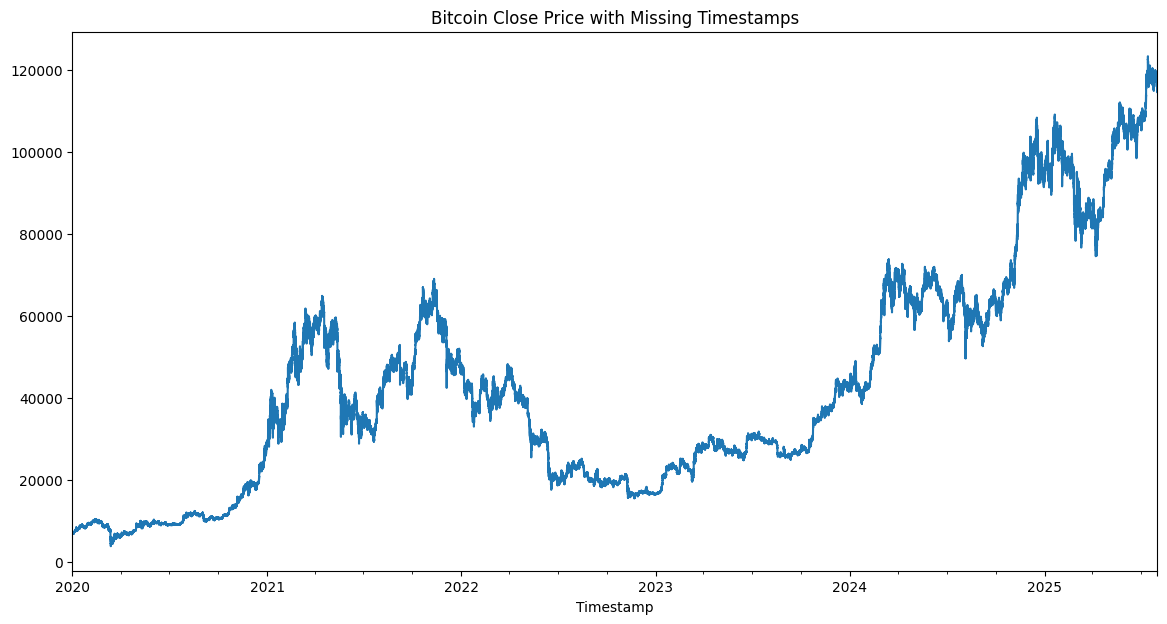

In [7]:

bitstamp_full = add_missing_timestamps(bitstamp, freq='1min')
# Plotting the Close price with missing timestamps
bitstamp_full['Close'].plot(figsize=(14, 7), title="Bitcoin Close Price with Missing Timestamps")

# using forward fill to fill the missing values
bitstamp_filled = fill_missing_values(bitstamp_full, method='ffill')

# display the missing values after filling
print("Missing values in the dataset:")
expected_range = pd.date_range(start=bitstamp_filled.index.min(), end=bitstamp_filled.index.max(), freq='1min')
missing_times = expected_range.difference(bitstamp_filled.index)
print("Missing timestamps:", len(missing_times))
print(missing_times[:10])